# `SVM`
- 用于线性或非线性分类、回归、异常检测
- 用于复杂但中小量的数据
- 对特征值的量级非常敏感，数据通常会先归一化处理
- 硬间隔分类模型，数据必须是线性可分的，对异常点非常敏感
- 软间隔分类模型，允许部分数据不满足约束
- 超参数 $C$，其值越小，允许不满足约束的数据点越多

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=1, loss='hinge')

- `SVC(kernal='linear',C=1)` 大数据集训练得很慢
- `SGDClassifier(loss='hinge',alpha=1(m*C))` 运用随机梯度下降方法训练线性 `SVM` 分类器，以处理大量数据

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set()

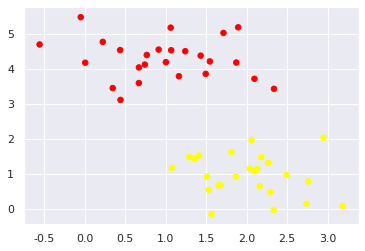

In [4]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap="autumn")

(-1, 3.5)

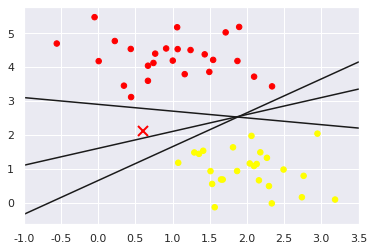

In [5]:
# 不同的分割平面

xfit = np.linspace(-1, 3.5)

plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1, 3.5)

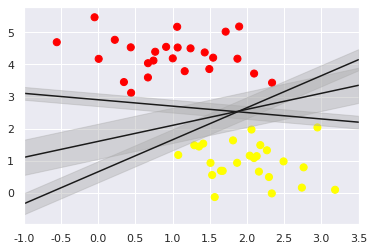

In [8]:
# 分割平面对应的间隔
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit,
                     yfit - d,
                     yfit + d,
                     edgecolor='none',
                     color='#AAAAAA',
                     alpha=0.4)

plt.xlim(-1, 3.5)

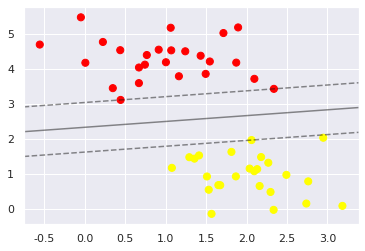

In [9]:
# 模型获得的最佳支持向量

from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(x, y)


def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    y, x = np.meshgrid(y, x)
    xy = np.vstack([x.ravel(), y.ravel()]).T
    P = model.decision_function(xy).reshape(x.shape)

    ax.contour(x,
               y,
               P,
               colors='k',
               levels=[-1, 0, 1],
               alpha=0.5,
               linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300,
                   linewidth=1,
                   facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, plot_support=True)

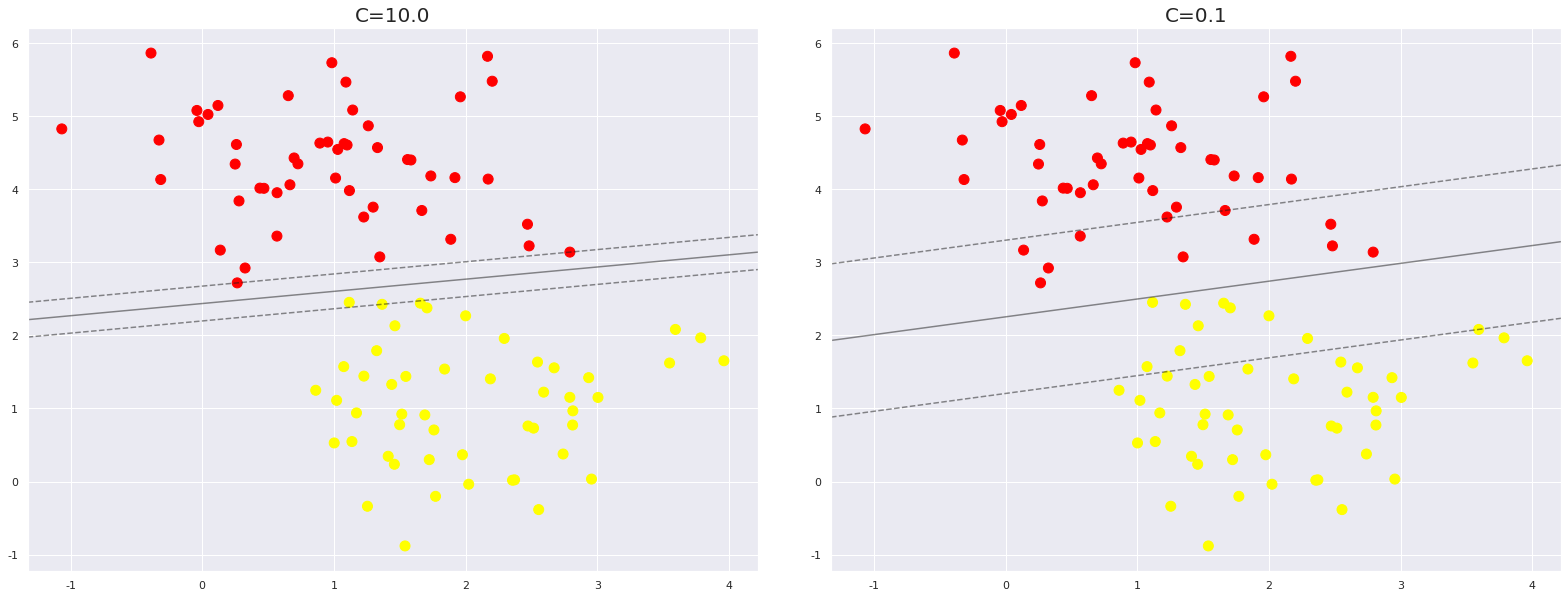

In [12]:
# 调参，改变间隔
x, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(24, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10, 0.1]):
    model = SVC(kernel='linear', C=C).fit(x, y)
    axi.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300,
                lw=1,
                facecolors='none')
    axi.set_title('C={0:.1f}'.format(C), size=20)

# 非线性SVM
对于非线性可分的数据集：
- 添加新特征，例如:原始数据 $x$, 添加多项式特征 $y=x^2$. 随后使用 `LinearSVC`
- `Polynomial Kernel`.并没有实际添加多项式特征，但可以获得相同的效果
    - 出现过拟合时，就减小 `degree` 参数，欠拟合就增大；`coef0` 控制高维多项式相对于低维对模型的影响。
- `Gaussian RBF Kernel`
    - `gamma` 参数越大，每个数据实例的影响范围越小，决策边界就越不规则；反之，边界越平滑。过拟合就减小 `gamma`，欠拟合就增大 `gamma`
    

计算复杂度：
- `LinearSVC` 基于 `liblinear` ：$O(m×n)$ ; m为样本数，n为特征数
- `SVC` 基于 `libsvm`，支持核技巧：$O(m^2×n)$ 和 $O(m^3×n)$

In [ ]:
# 新特征
from sklearn.preprocessing import PolynomialFeatures

# ploy 核技巧
from sklearn.svm import SVC
svm_clf = SVC(kernel='poly', degree=3, coef0=1, C=5)

# Gaussian RBF Kernel
from sklearn.svm import SVC
svm_clf=SVC(kernel='rbf',gamma=5,coef0=1,C=0.001)

/home/yangbin7/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yangbin7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linetypes'


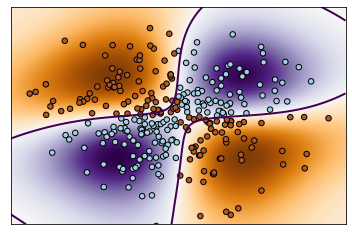

In [2]:
# 非线性 SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

np.random.seed(0)
x = np.random.randn(300, 2)
y = np.logical_xor(x[:, 0] > 0, x[:, 1] > 0)

clf = svm.NuSVC()
clf.fit(x, y)

z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.imshow(z,
           interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           aspect='auto',
           origin='lower',
           cmap=plt.cm.PuOr_r)

contours = plt.contour(xx, yy, z, levels=[0], linewidths=2, linetypes='--')
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

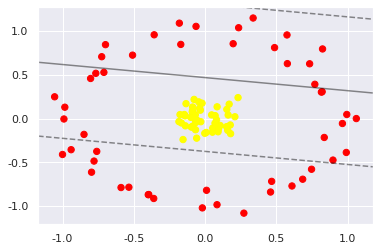

In [10]:
# 非线性可分数据与线性SVM

from sklearn.datasets import make_circles
x, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel="linear").fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

/home/yangbin7/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


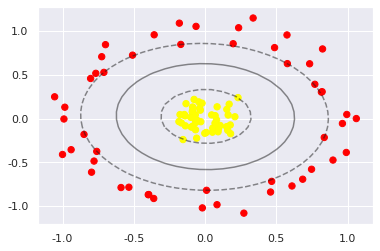

In [11]:
# 核技巧实现非线性 SVM
clf = SVC(kernel='rbf', C=1E6)
clf.fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=300,
            lw=1,
            facecolors='none')

# 示例：面部识别

In [ ]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
fig.set_size_inches(12, 8)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [ ]:
# 先降维，然后输入到 SVM 模型中
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150,
          svd_solver='randomized',
          whiten=True,
          random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# 搜索最优参数
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(faces.data,
                                                faces.target,
                                                random_state=42)

from sklearn.grid_search import GridSearchCV

param_grid = {
    'svc__C': [1, 5, 10, 50],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]
}

grid = GridSearchCV(model, param_grid)

%time grid.fit(xtrain,ytrain)
print(grid.best_params_)

In [ ]:
# 最优模型预测结果
model = grid.best_estimator_
yfit = model.predict(xtest)

fig, ax = plt.subplots(4, 6)
fig.set_size_inches(12, 8)
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names;Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true labels')
plt.ylabel('predicted labels')

# 对比不同的 `kernel` 技巧

/home/yangbin7/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/yangbin7/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


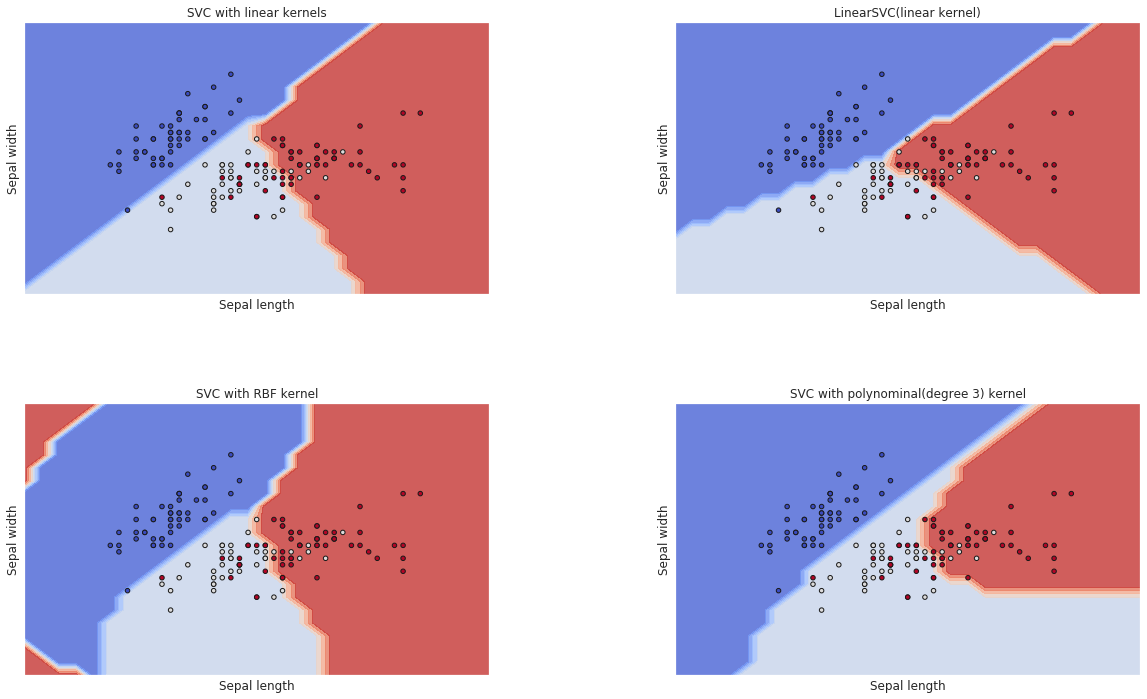

In [15]:
# LinearSVC minimizes the squared hinge loss
# ____while SVC minimizes the regular hinge loss.
# LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction
# ____while SVC uses the One-vs-One multiclass reduction.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx, yy)


def plot_contour(ax, clf, xx, yy, **params):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    out = ax.contourf(xx, yy, z, **params)
    return (out)


iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target

c = 1.0
models = (svm.SVC(kernel='linear', C=c), svm.LinearSVC(C=c),
          svm.SVC(kernel='rbf', gamma=0.7,
                  C=c), svm.SVC(kernel='poly', degree=3, C=c))
models = (clf.fit(x, y) for clf in models)

titles = ('SVC with linear kernels', 'LinearSVC(linear kernel)',
          'SVC with RBF kernel', 'SVC with polynominal(degree 3) kernel')

fig, sub = plt.subplots(2, 2, figsize=(20, 12))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

x0, x1 = x[:, 0], x[:, 1]

xx, yy = make_meshgrid(x0, x1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contour(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()